# Data Exploration/Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Univariate Analysis

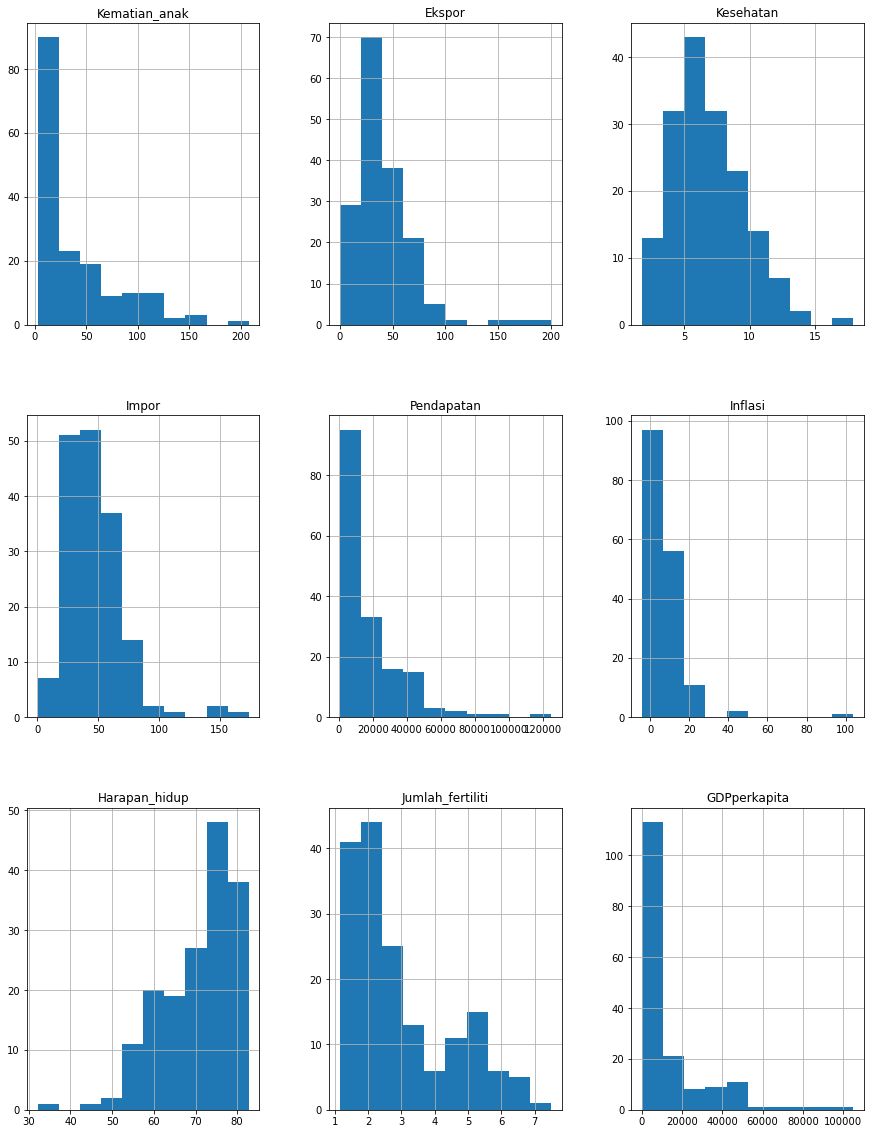

In [6]:
df.hist(bins=10, figsize=(15, 20))
plt.show()

 # Bivariate Analysis

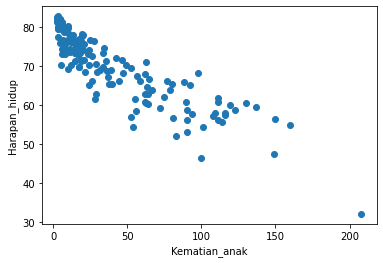

In [7]:
plt.scatter(df['Kematian_anak'], df['Harapan_hidup'])
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
plt.show()

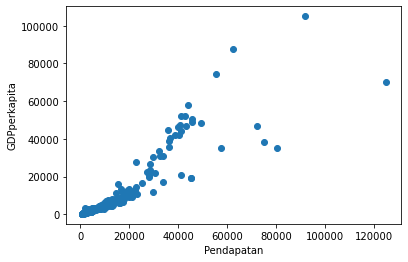

In [8]:
plt.scatter(df['Pendapatan'], df['GDPperkapita'])
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

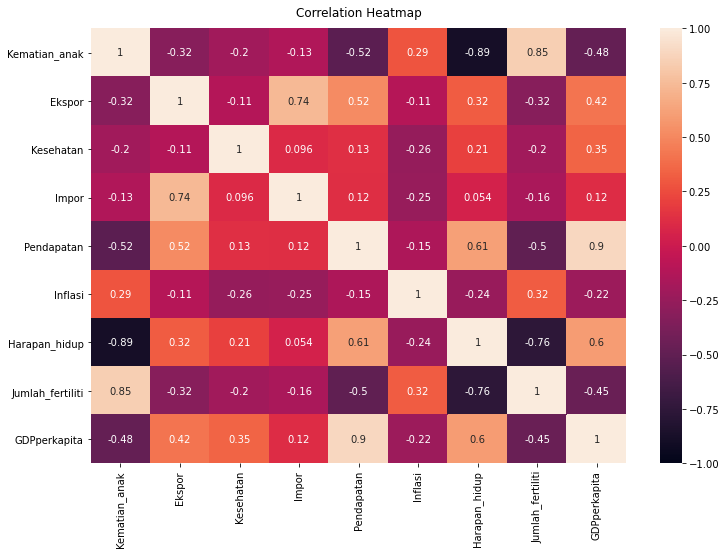

In [9]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Choosing Variabel

In [10]:
df_candidate = df[['Negara', 'Kematian_anak', 'Harapan_hidup','Pendapatan', 'GDPperkapita']]
df_candidate

,Negara,Kematian_anak,Harapan_hidup,Pendapatan,GDPperkapita
0,Afghanistan,90.2,56.2,1610,553
1,Albania,16.6,76.3,9930,4090
2,Algeria,27.3,76.5,12900,4460
3,Angola,119.0,60.1,5900,3530
4,Antigua and Barbuda,10.3,76.8,19100,12200
...,...,...,...,...,...
162,Vanuatu,29.2,63.0,2950,2970
163,Venezuela,17.1,75.4,16500,13500
164,Vietnam,23.3,73.1,4490,1310
165,Yemen,56.3,67.5,4480,1310


# Multivariate Analysis

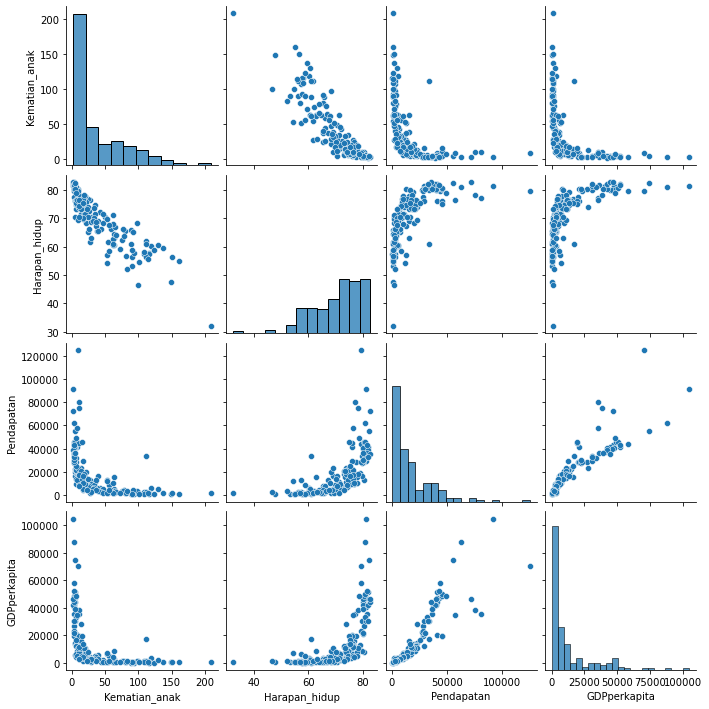

In [11]:
sns.pairplot(df_candidate, diag_kind='hist', corner=False)
plt.show()

# Outliers Handling

<AxesSubplot:xlabel='Kematian_anak'>

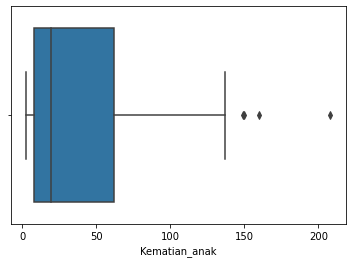

In [12]:
display(sns.boxplot(x=df_candidate['Kematian_anak']))

<AxesSubplot:xlabel='Harapan_hidup'>

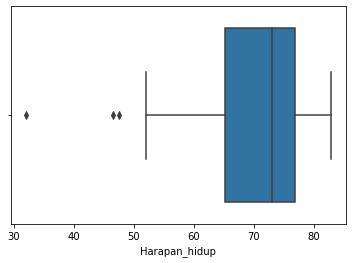

In [13]:
display(sns.boxplot(x=df_candidate['Harapan_hidup']))

<AxesSubplot:xlabel='Pendapatan'>

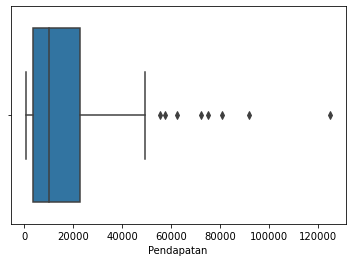

In [14]:
display(sns.boxplot(x=df_candidate['Pendapatan']))

<AxesSubplot:xlabel='GDPperkapita'>

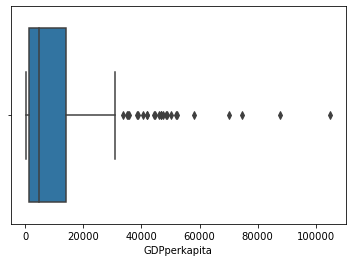

In [15]:
display(sns.boxplot(x=df_candidate['GDPperkapita']))

<AxesSubplot:xlabel='Kematian_anak'>

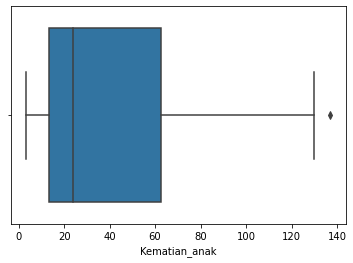

In [16]:
def outlier_handling(df):
    q1 = df.quantile(0.25)         
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    new_df = df[~((df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr))))]
    return new_df

df_prep = outlier_handling(df_candidate[['Kematian_anak', 'Harapan_hidup', 'Pendapatan', 'GDPperkapita']])
df_prep.dropna(axis=0, inplace=True)

display(sns.boxplot(x=df_prep['Kematian_anak']))

<AxesSubplot:xlabel='Harapan_hidup'>

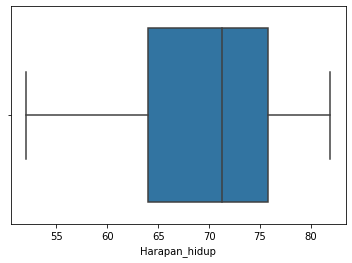

In [17]:
display(sns.boxplot(x=df_prep['Harapan_hidup']))

<AxesSubplot:xlabel='Pendapatan'>

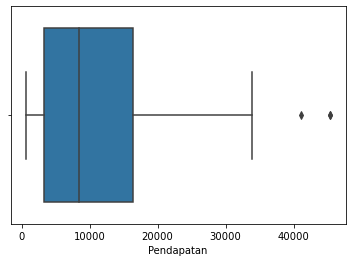

In [18]:
display(sns.boxplot(x=df_prep['Pendapatan']))

<AxesSubplot:xlabel='GDPperkapita'>

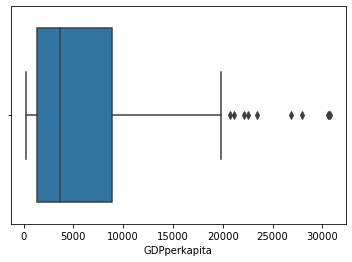

In [19]:
display(sns.boxplot(x=df_prep['GDPperkapita']))

# Data Scaling Using StandardScaler

In [20]:
df_scaled = df_prep.copy()
df_scaled.insert(0, 'Negara', df_candidate['Negara'].copy())

features = df_scaled[['Kematian_anak', 'Harapan_hidup','Pendapatan', 'GDPperkapita']]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df_scaled[['Kematian_anak', 'Harapan_hidup','Pendapatan', 'GDPperkapita']] = features
df_scaled

,Negara,Kematian_anak,Harapan_hidup,Pendapatan,GDPperkapita
0,Afghanistan,1.422745,-1.815960,-0.979242,-0.840648
1,Albania,-0.668452,0.911397,-0.136445,-0.344530
2,Algeria,-0.364433,0.938535,0.164409,-0.292632
3,Angola,2.241039,-1.286772,-0.544675,-0.423078
4,Antigua and Barbuda,-0.847454,0.979242,0.792455,0.793020
...,...,...,...,...,...
162,Vanuatu,-0.310448,-0.893272,-0.843503,-0.501627
163,Venezuela,-0.654246,0.789277,0.529081,0.975364
164,Vietnam,-0.478085,0.477191,-0.687504,-0.734467
165,Yemen,0.459544,-0.282670,-0.688517,-0.734467


# Kematian_anak and Harapan_hidup Analysis

In [21]:
df_model = df_scaled[['Kematian_anak', 'Harapan_hidup']].copy()
df_model

,Kematian_anak,Harapan_hidup
0,1.422745,-1.815960
1,-0.668452,0.911397
2,-0.364433,0.938535
3,2.241039,-1.286772
4,-0.847454,0.979242
...,...,...
162,-0.310448,-0.893272
163,-0.654246,0.789277
164,-0.478085,0.477191
165,0.459544,-0.282670


# Find Optimal K Using Elbow Method

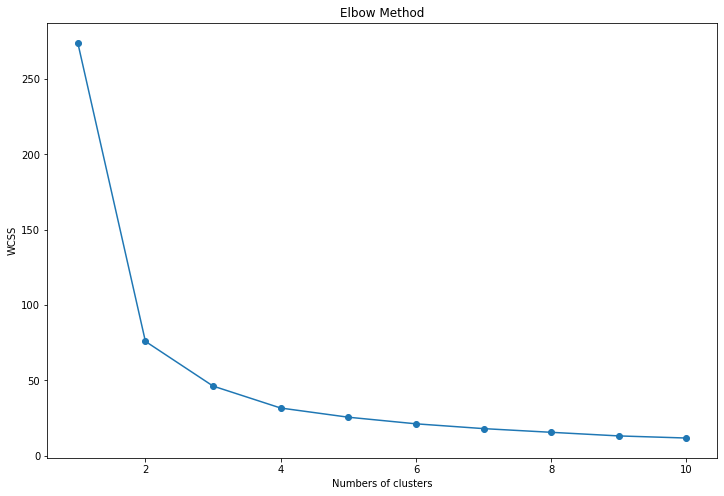

In [22]:
# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_model.values)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

# Validation using Silhouette Score

In [23]:
Kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_model)
labels1 = Kmeans1.labels_

Kmeans2 = KMeans(n_clusters=3, random_state=42).fit(df_model)
labels2 = Kmeans2.labels_

Kmeans3 = KMeans(n_clusters=4, random_state=42).fit(df_model)
labels3 = Kmeans3.labels_

print('K=2')
print(silhouette_score(df_model, labels=labels1))
print('\nK=3')
print(silhouette_score(df_model, labels=labels2))
print('\nK=3')
print(silhouette_score(df_model, labels=labels3))

K=2
0.6257876220156149

K=3
0.5470548944541891

K=3
0.4772090776702319


# Clustering with K=2

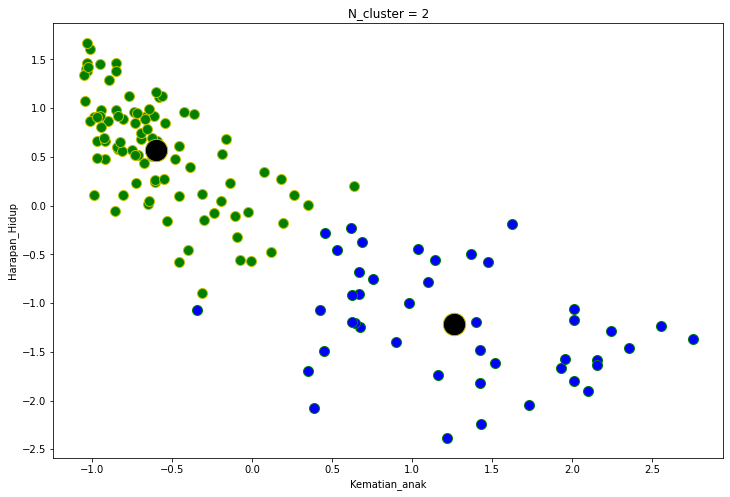

In [24]:
new_df = pd.DataFrame(data=df_model, columns=['Kematian_anak', 'Harapan_hidup'])
new_df['cluster'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df['Kematian_anak'][new_df.cluster == 0], new_df['Harapan_hidup'][new_df.cluster == 0], c='blue', s=100, edgecolor='g')
plt.scatter(new_df['Kematian_anak'][new_df.cluster == 1], new_df['Harapan_hidup'][new_df.cluster == 1], c='green', s=100, edgecolor='y')

plt.scatter(Kmeans1.cluster_centers_[:, 0], Kmeans1.cluster_centers_[:, 1], c='black', s=500, edgecolor='y')
plt.title('N_cluster = 2')
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_Hidup')
plt.show()

In [25]:
df_kmeans = new_df.copy()
df_kmeans.insert(0, 'Negara', df_scaled['Negara'].copy())
df_kmeans

,Negara,Kematian_anak,Harapan_hidup,cluster
0,Afghanistan,1.422745,-1.815960,0
1,Albania,-0.668452,0.911397,1
2,Algeria,-0.364433,0.938535,1
3,Angola,2.241039,-1.286772,0
4,Antigua and Barbuda,-0.847454,0.979242,1
...,...,...,...,...
162,Vanuatu,-0.310448,-0.893272,1
163,Venezuela,-0.654246,0.789277,1
164,Vietnam,-0.478085,0.477191,1
165,Yemen,0.459544,-0.282670,0


# Cluster 0 = Kematian_anak tinggi dan Harapan_hidup rendah

In [26]:
df_test = df_kmeans[(df_kmeans['cluster'] == 0)]
df_test

,Negara,Kematian_anak,Harapan_hidup,cluster
0,Afghanistan,1.422745,-1.815960,0
3,Angola,2.241039,-1.286772,0
17,Benin,2.013735,-1.056100,0
21,Botswana,0.351575,-1.693840,0
25,Burkina Faso,2.155800,-1.585288,0
26,Burundi,1.519349,-1.612426,0
28,Cameroon,1.928496,-1.666702,0
36,Comoros,1.365919,-0.499773,0
37,"Congo, Dem. Rep.",2.155800,-1.639564,0
38,"Congo, Rep.",0.675483,-1.246065,0


# Pendapatan and GDPperkapita Analysis

In [27]:
df_model2 = df_scaled[['Pendapatan', 'GDPperkapita']].copy()
df_model2

,Pendapatan,GDPperkapita
0,-0.979242,-0.840648
1,-0.136445,-0.344530
2,0.164409,-0.292632
3,-0.544675,-0.423078
4,0.792455,0.793020
...,...,...
162,-0.843503,-0.501627
163,0.529081,0.975364
164,-0.687504,-0.734467
165,-0.688517,-0.734467


# Find Optimal K using Elbow Method

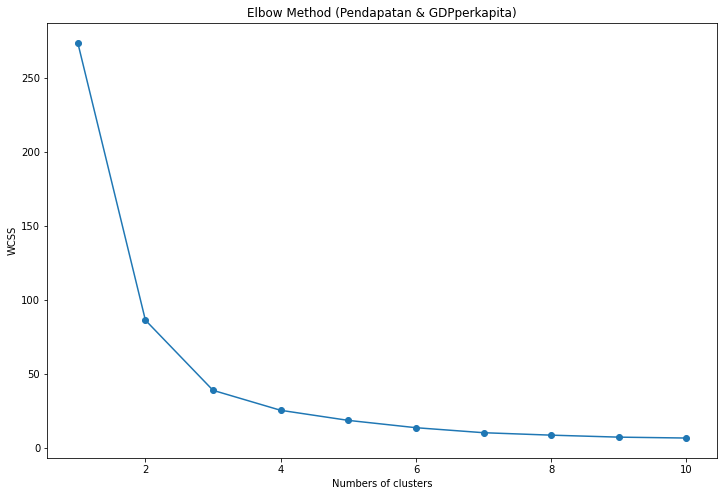

In [36]:
# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_model2.values)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method (Pendapatan & GDPperkapita)')
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

# Validation Using Silhouette Score

In [29]:
Kmeans21 = KMeans(n_clusters=2, random_state=42).fit(df_model2)
labels21 = Kmeans21.labels_

Kmeans22 = KMeans(n_clusters=3, random_state=42).fit(df_model2)
labels22 = Kmeans22.labels_

Kmeans23 = KMeans(n_clusters=4, random_state=42).fit(df_model2)
labels23 = Kmeans23.labels_

print('K=2')
print(silhouette_score(df_model2, labels=labels21))
print('\nK=3')
print(silhouette_score(df_model2, labels=labels22))
print('\nK=3')
print(silhouette_score(df_model2, labels=labels23))

K=2
0.6491057643161912

K=3
0.6070391387874169

K=3
0.558301383270302


# Clustering with K=2

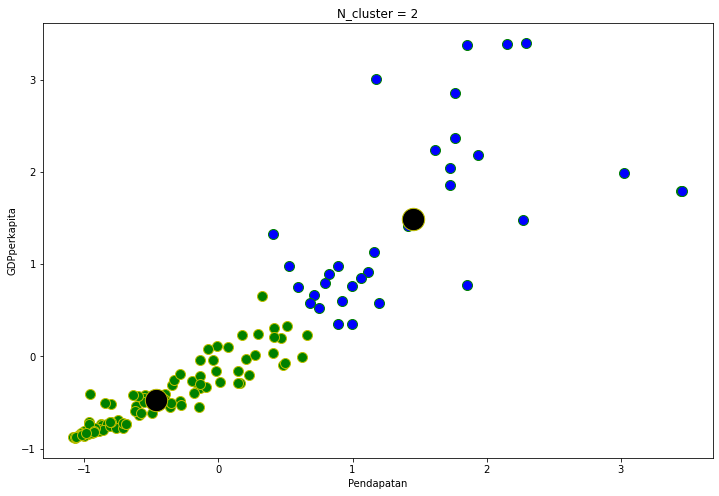

In [30]:
new_df2= pd.DataFrame(data=df_model2, columns=['Pendapatan', 'GDPperkapita'])
new_df2['cluster'] = labels21

plt.figure(figsize=(12,8))
plt.scatter(new_df2['Pendapatan'][new_df2.cluster == 0], new_df2['GDPperkapita'][new_df2.cluster == 0], c='blue', s=100, edgecolor='g')
plt.scatter(new_df2['Pendapatan'][new_df2.cluster == 1], new_df2['GDPperkapita'][new_df2.cluster == 1], c='green', s=100, edgecolor='y')

plt.scatter(Kmeans21.cluster_centers_[:, 0], Kmeans21.cluster_centers_[:, 1], c='black', s=500, edgecolor='y')
plt.title('N_cluster = 2')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

In [31]:
df_kmeans2 = new_df2.copy()
df_kmeans2.insert(0, 'Negara', df_scaled['Negara'].copy())
df_kmeans2

,Negara,Pendapatan,GDPperkapita,cluster
0,Afghanistan,-0.979242,-0.840648,1
1,Albania,-0.136445,-0.344530,1
2,Algeria,0.164409,-0.292632,1
3,Angola,-0.544675,-0.423078,1
4,Antigua and Barbuda,0.792455,0.793020,0
...,...,...,...,...
162,Vanuatu,-0.843503,-0.501627,1
163,Venezuela,0.529081,0.975364,0
164,Vietnam,-0.687504,-0.734467,1
165,Yemen,-0.688517,-0.734467,1


# Cluster 1 = Pendapatan dan GDPperkapita rendah

In [32]:
df_test2 = df_kmeans2[(df_kmeans2['cluster'] == 1)]
df_test2

,Negara,Pendapatan,GDPperkapita,cluster
0,Afghanistan,-0.979242,-0.840648,1
1,Albania,-0.136445,-0.344530,1
2,Algeria,0.164409,-0.292632,1
3,Angola,-0.544675,-0.423078,1
6,Armenia,-0.463637,-0.466561,1
...,...,...,...,...
161,Uzbekistan,-0.712829,-0.724648,1
162,Vanuatu,-0.843503,-0.501627,1
164,Vietnam,-0.687504,-0.734467,1
165,Yemen,-0.688517,-0.734467,1


# List negara yang perlu menjadi fokus

In [37]:
df_merge = pd.merge(df_test, df_test2, on='Negara', how='inner', suffixes=('_Model1', '_Model2'))
df_merge

,Negara,Kematian_anak,Harapan_hidup,cluster_Model1,Pendapatan,GDPperkapita,cluster_Model2
0,Afghanistan,1.422745,-1.815960,0,-0.979242,-0.840648,1
1,Angola,2.241039,-1.286772,0,-0.544675,-0.423078,1
2,Benin,2.013735,-1.056100,0,-0.957969,-0.811893,1
3,Botswana,0.351575,-1.693840,0,0.204928,-0.027531,1
4,Burkina Faso,2.155800,-1.585288,0,-0.997475,-0.837562,1
5,Burundi,1.519349,-1.612426,0,-1.064940,-0.885813,1
6,Cameroon,1.928496,-1.666702,0,-0.872879,-0.734467,1
7,Comoros,1.365919,-0.499773,0,-0.999501,-0.810350,1
8,"Congo, Dem. Rep.",2.155800,-1.639564,0,-1.080641,-0.871366,1
9,"Congo, Rep.",0.675483,-1.246065,0,-0.616596,-0.533888,1


In [34]:
df_merge.to_csv('Data_Negara_Fokus.csv', index=False)